<a href="https://colab.research.google.com/github/pjatk-suml2023/suml-lab-Milosz-studies/blob/main/SUML_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from scipy import stats

%matplotlib inline

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Datasets')

# Przygotowanie danych do analizy

In [ ]:
base_data = pd.read_csv('DSP_6.csv')

In [ ]:
train = base_data.copy(deep=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

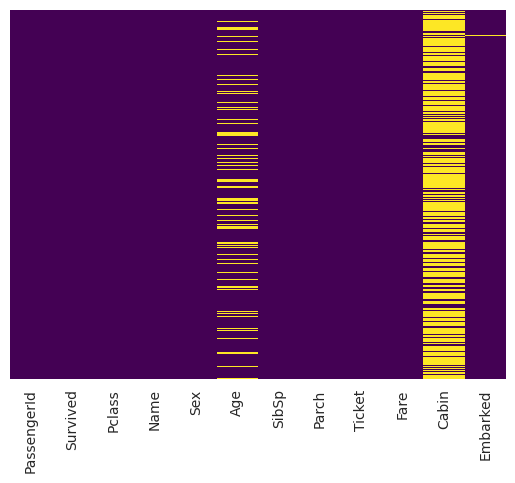

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
train.drop(columns=['Cabin'], inplace=True)

In [ ]:
train.fillna(train.mean(numeric_only=True), inplace=True)

In [ ]:
train.dropna(inplace=True)

# Eksploracja danych

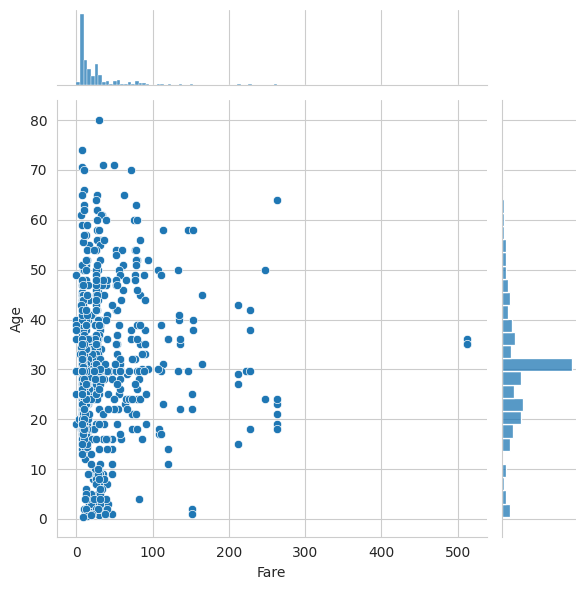

In [ ]:
sns.jointplot(x='Fare', y='Age', data=train)

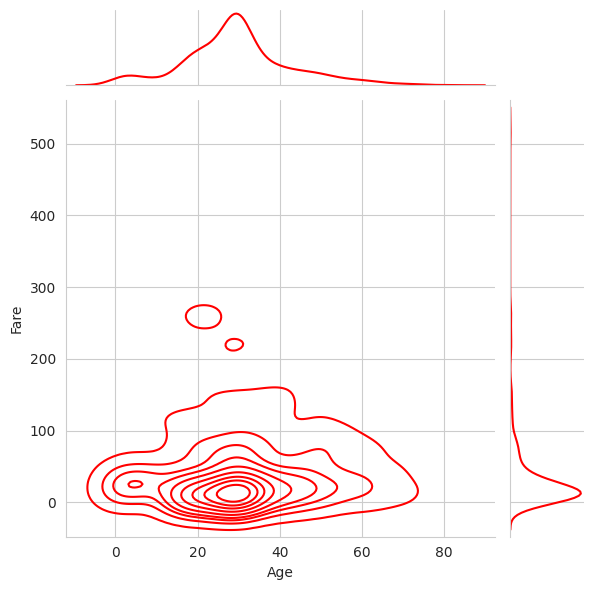

In [ ]:
sns.jointplot(x='Age', y='Fare', data=train, color='red', kind='kde')

<Axes: xlabel='Survived', ylabel='count'>

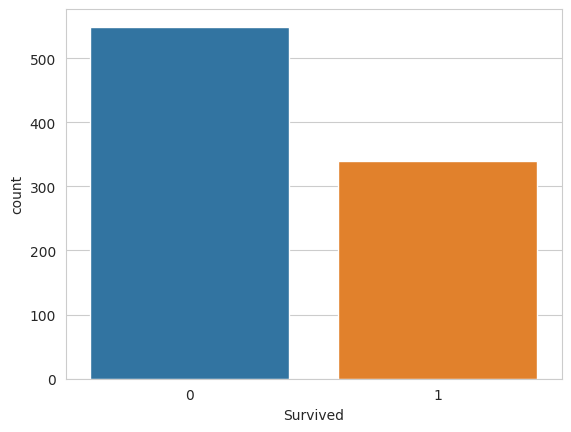

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

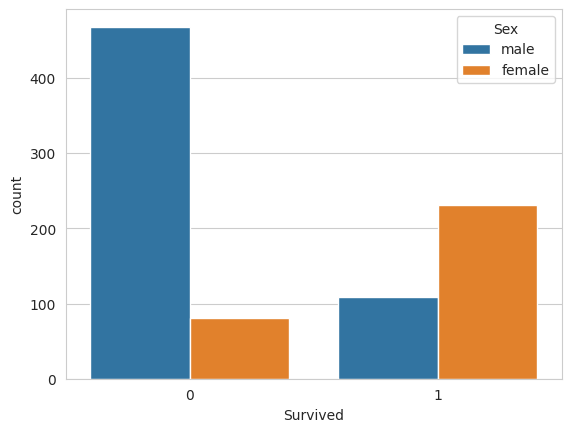

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

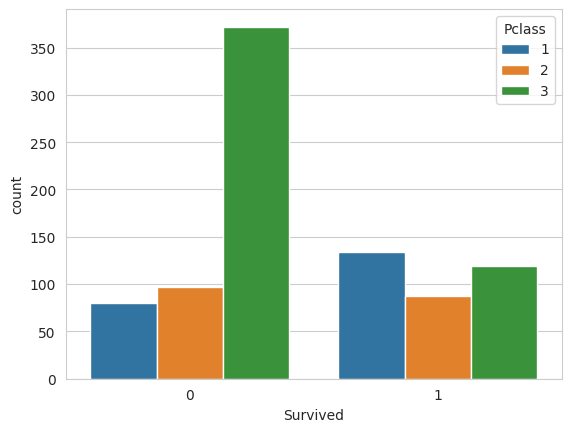

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass')

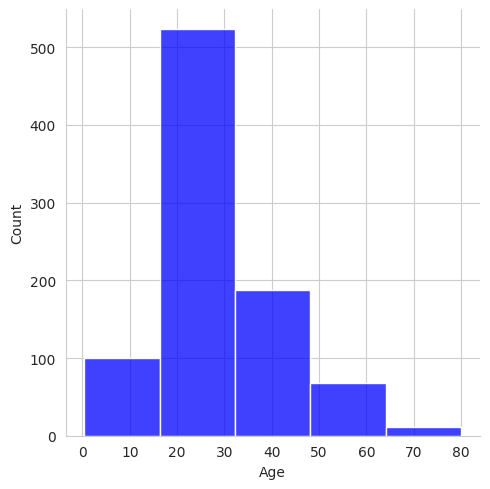

In [ ]:
sns.displot(train['Age'], kde=False, color= 'blue', bins=5)

<Axes: xlabel='Pclass', ylabel='Age'>

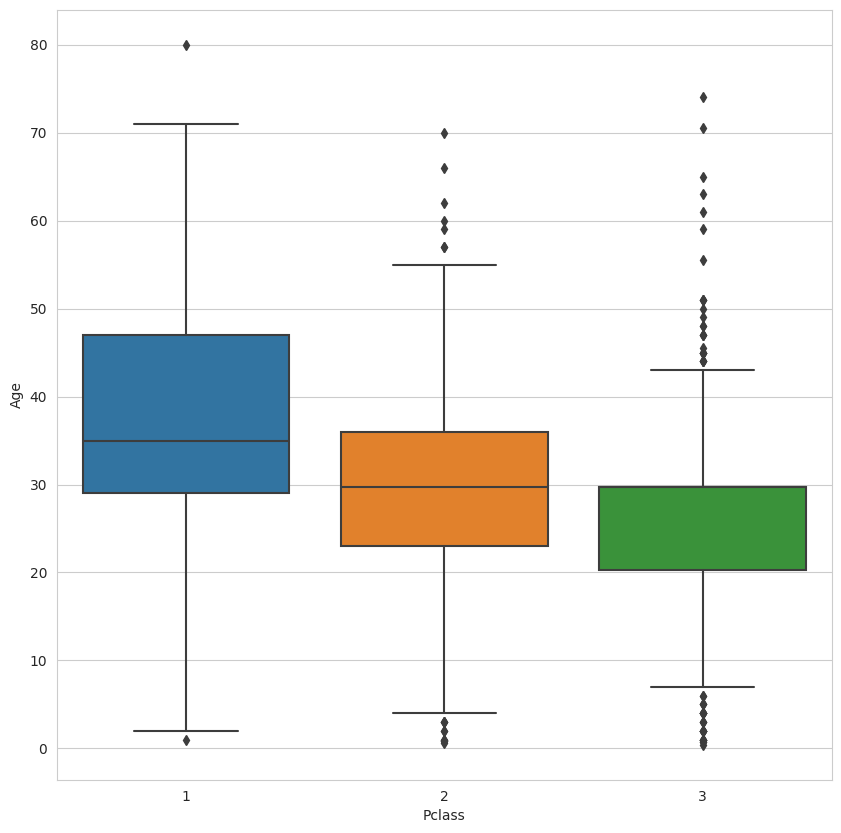

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
cf.go_offline()

In [ ]:
train['Age'].iplot(kind='hist', bins=20, color='green')

# Konwersja danych do modelu regresji

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
train = pd.concat([train, sex, embark], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Regresja logistyczna

In [ ]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=2137)

In [ ]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.83      0.78      0.81        37

    accuracy                           0.84        89
   macro avg       0.84      0.83      0.84        89
weighted avg       0.84      0.84      0.84        89



In [ ]:
confusion_matrix(y_test, predictions)

array([[46,  6],
       [ 8, 29]])

# Zadanie 1

Załaduj ponownie zbiór danych (DSP_6.csv), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach - wyświetl liczbę brakujących danych.

In [ ]:
df_zad1 = base_data.copy(deep=True)

In [ ]:
df_zad1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Zadanie 2

Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru figsize.

In [ ]:
df_zad2 = base_data.copy(deep=True)

In [ ]:
df_zad2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='count'>

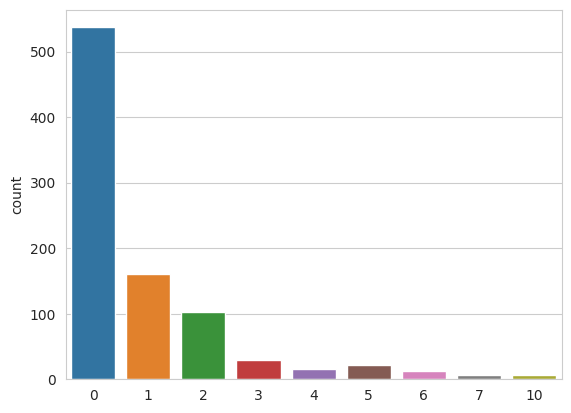

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=df_zad2['SibSp'] + df_zad2['Parch'])

<Axes: xlabel='Fare'>

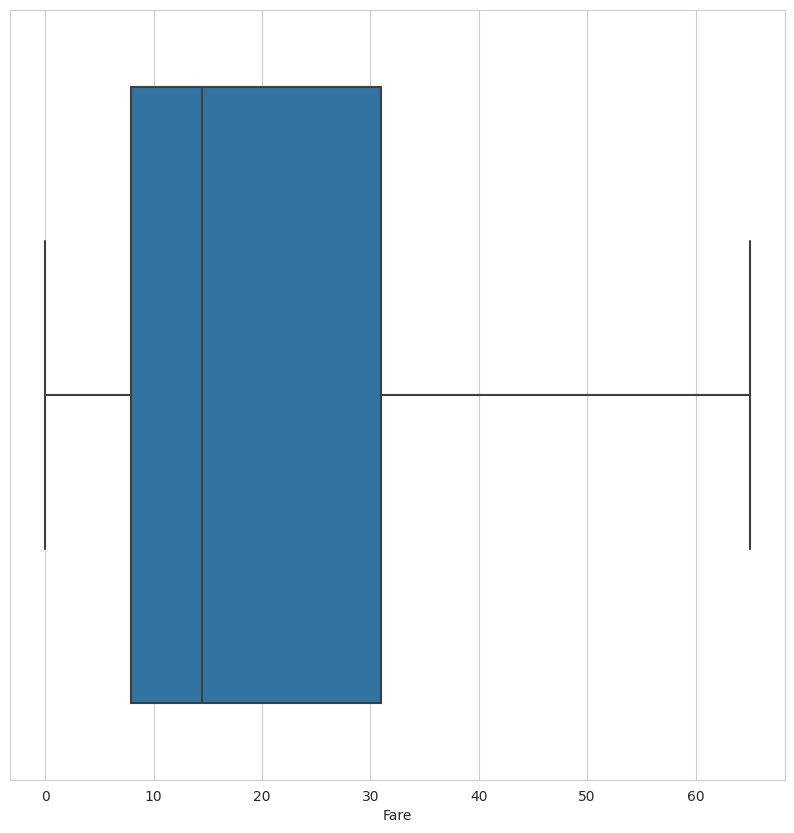

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Fare', data=df_zad2, showfliers=False)

# Zadanie 3

In [ ]:
df_zad3 = base_data.copy(deep=True)

In [ ]:
df_zad3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Q1 = df_zad3['Age'].quantile(0.25)
Q3 = df_zad3['Age'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_zad3[(df_zad3['Age'] < Q1 - threshold * IQR) | (df_zad3['Age'] > Q3 + threshold * IQR)]

df_zad3 = df_zad3.drop(outliers.index)

In [ ]:
X_zad3 = df_zad3.drop('Survived', axis=1)
y_zad3 = df_zad3['Survived']

In [ ]:
X_train_zad3, X_test_zad3, y_train_zad3, y_test_zad3 = train_test_split(X_zad3, y_zad3, test_size=.1, random_state=2137)

In [ ]:
#logmodel = LogisticRegression(max_iter=500)
#logmodel.fit(X_train_zad3, y_train_zad3)
#predictions = logmodel.predict(X_test_zad3)

In [ ]:
df_zad3 = train.copy(deep=True)

In [ ]:
X_zad3 = df_zad3.drop('Survived', axis=1)
y_zad3 = df_zad3['Survived']

X_train_zad3, X_test_zad3, y_train_zad3, y_test_zad3 = train_test_split(X_zad3, y_zad3, test_size=.2, random_state=2137)

In [ ]:
logmodel_zad3 = LogisticRegression(max_iter=250)
logmodel_zad3.fit(X_train_zad3, y_train_zad3)
predictions_zad3 = logmodel_zad3.predict(X_test_zad3)

In [ ]:
print(classification_report(y_test_zad3, predictions_zad3))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       102
           1       0.81      0.75      0.78        76

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



# Zadanie 4

In [ ]:
bare_dataset_zad4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/DSP_2.csv')

In [ ]:
df_zad4 = bare_dataset_zad4.copy(deep=True)
df_zad4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_zad4.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
chest_pain_type = pd.get_dummies(df_zad4['ChestPainType'], drop_first=True)

In [ ]:
sex_zad4 = pd.get_dummies(df_zad4['Sex'], drop_first=True)

In [ ]:
restingECG = pd.get_dummies(df_zad4['RestingECG'], drop_first=True)

In [ ]:
exerciseAngina = pd.get_dummies(df_zad4['ExerciseAngina'], drop_first=True)

In [ ]:
sT_Slope = pd.get_dummies(df_zad4['ST_Slope'], drop_first=True)

In [ ]:
df_zad4 = pd.concat([df_zad4, chest_pain_type, sex_zad4, restingECG, exerciseAngina, sT_Slope], axis=1)
df_zad4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,HeartDisease,ATA,NAP,TA,M,Normal,ST,Y,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,1,0,0,1,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,1,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,1,0,0,1,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,1,0,0,0,0,1,0,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,0,0,1,0,1,1,0,0,0,1


In [ ]:
df_zad4.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
df_zad4.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ATA,NAP,TA,M,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,0,0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,1,0,0,0,1


In [ ]:
X_zad4 = df_zad4.drop('HeartDisease', axis=1)
y_zad4 = df_zad4['HeartDisease']

In [ ]:
X_train_zad4, X_test_zad4, y_train_zad4, y_test_zad4 = train_test_split(X_zad4, y_zad4, test_size=.1, random_state=2137)

In [ ]:
logmodel_zad4 = LogisticRegression(max_iter=500)
logmodel_zad4.fit(X_train_zad4, y_train_zad4)
predictions_zad4 = logmodel_zad4.predict(X_test_zad4)

In [ ]:
print(classification_report(y_test_zad4, predictions_zad4))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.92      0.92      0.92        49

    accuracy                           0.91        92
   macro avg       0.91      0.91      0.91        92
weighted avg       0.91      0.91      0.91        92

